In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
def parse_trace_slowdown(dir, filename, bottleneck_bw):
    col = ["tmp_pkts", "flow duration", "fin_fid", "rtt times", "group_id", "Tw_", "Tp_", "Np_", "?1", "?2", "?3", "?4", "?5", "Average rate", "start time"]
    df = pd.read_csv(dir+filename, sep = ' ', header = None)
    df.columns = col
    #df["Min_FCT"] = df["tmp_pkts"]*pktsize/bottleneck_bw
    df["FCT_slowdown"] = bottleneck_bw/df["Average rate"]
    return df

In [3]:
def parse_trace(dir, filename):
    col = ["tmp_pkts", "flow duration", "fin_fid", "rtt times", "group_id", "Tw_", "Tp_", "Np_", "?1", "?2", "?3", "?4", "?5", "Average rate", "start time"]
    df = pd.read_csv(dir+filename, sep = ' ', header = None)
    df.columns = col
    df["Normalized FCT"] = 1/df["Average rate"]
    return df

In [4]:
def read_trace(dir, toponame):
    #dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
    filename = "tcp_flow_100_0.1_"+toponame+".tr"
    #filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
    tcp_100_0d1 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.3_"+toponame+".tr"
    tcp_100_0d3 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.5_"+toponame+".tr"
    tcp_100_0d5 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.7_"+toponame+".tr"
    tcp_100_0d7 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.9_"+toponame+".tr"
    tcp_100_0d9 = parse_trace(dir, filename)
    return [tcp_100_0d1, tcp_100_0d3, tcp_100_0d5, tcp_100_0d7, tcp_100_0d9]

In [5]:
def read_trace_and_cal_FCT(dir, toponame):
    #dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
    filename = "tcp_flow_100_0.1_"+toponame+".tr"
    #filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
    tcp_100_0d1 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.3_"+toponame+".tr"
    tcp_100_0d3 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.5_"+toponame+".tr"
    tcp_100_0d5 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.7_"+toponame+".tr"
    tcp_100_0d7 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.9_"+toponame+".tr"
    tcp_100_0d9 = parse_trace(dir, filename)
    return [tcp_100_0d1["Normalized FCT"].mean(), \
            tcp_100_0d3["Normalized FCT"].mean(), \
            tcp_100_0d5["Normalized FCT"].mean(), \
            tcp_100_0d7["Normalized FCT"].mean(), \
            tcp_100_0d9["Normalized FCT"].mean()]

In [6]:
def plotting_FCT(utilization_list, FCT_list0, FCT_list1, FCT_list2, FCT_list3, FCT_list4, FCT_list5, label0, label1, label2, label3, label4, label5):
    plt.figure(figsize=(8,5))
    #plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
    plt.xlabel("Link utilization")
    plt.ylabel("Normalized FCT")
    #plt.xscale('log')
    plt.title("Normalized FCT")
    
    #period_list = [0.01, 0.05, 0.1, 0.5, 1]
    line0 = plt.plot(utilization_list, FCT_list0, color='red', marker='s', markersize = 12, label=label0)
    line1 = plt.plot(utilization_list, FCT_list1, color='blue', marker='o', markersize = 10, label=label1)
    line2 = plt.plot(utilization_list, FCT_list2, color='green', marker='s', markersize = 12, label=label2)
    line3 = plt.plot(utilization_list, FCT_list3, color='gold', marker='o', markersize = 10, label=label3)
    line4 = plt.plot(utilization_list, FCT_list4, color='pink', marker='s', markersize = 12, label=label4)
    line5 = plt.plot(utilization_list, FCT_list5, color='purple', marker='o', markersize = 10, label=label5)
    #line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
    #line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
    
    #plt.legend([line1, line2, line3, line4], loc='best')
    plt.legend(loc='best')
    plt.show()

In [7]:
def plotting_2FCT(utilization_list, FCT_list0, FCT_list1, label0, label1):
    plt.figure(figsize=(8,5))
    #plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
    plt.xlabel("Link utilization")
    plt.ylabel("Normalized FCT")
    #plt.xscale('log')
    plt.title("Normalized FCT")
    
    #period_list = [0.01, 0.05, 0.1, 0.5, 1]
    line0 = plt.plot(utilization_list, FCT_list0, color='red', marker='s', markersize = 12, label=label0)
    line1 = plt.plot(utilization_list, FCT_list1, color='blue', marker='o', markersize = 10, label=label1)
    #line2 = plt.plot(utilization_list, FCT_list2, color='green', marker='s', markersize = 12, label=label2)
    #line3 = plt.plot(utilization_list, FCT_list3, color='gold', marker='o', markersize = 10, label=label3)
    #line4 = plt.plot(utilization_list, FCT_list4, color='pink', marker='s', markersize = 12, label=label4)
    #line5 = plt.plot(utilization_list, FCT_list5, color='purple', marker='o', markersize = 10, label=label5)
    #line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
    #line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
    
    #plt.legend([line1, line2, line3, line4], loc='best')
    plt.legend(loc='best')
    plt.show()

In [8]:
def plotting_FCT_log(utilization_list, FCT_list0, FCT_list1, FCT_list2, FCT_list3, FCT_list4, FCT_list5, label0, label1, label2, label3, label4, label5):
    plt.figure(figsize=(8,5))
    #plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
    plt.xlabel("Link utilization")
    plt.ylabel("Normalized FCT")
    #plt.xscale('log')
    plt.title("Normalized FCT")
    
    #period_list = [0.01, 0.05, 0.1, 0.5, 1]
    line0 = plt.plot(utilization_list, FCT_list0, color='red', marker='s', markersize = 12, label=label0)
    line1 = plt.plot(utilization_list, FCT_list1, color='blue', marker='o', markersize = 10, label=label1)
    line2 = plt.plot(utilization_list, FCT_list2, color='green', marker='s', markersize = 12, label=label2)
    line3 = plt.plot(utilization_list, FCT_list3, color='gold', marker='o', markersize = 10, label=label3)
    line4 = plt.plot(utilization_list, FCT_list4, color='pink', marker='s', markersize = 12, label=label4)
    line5 = plt.plot(utilization_list, FCT_list5, color='purple', marker='o', markersize = 10, label=label5)
    #line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
    #line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
    
    plt.yscale('log')
    
    #plt.legend([line1, line2, line3, line4], loc='best')
    plt.legend(loc='best')
    plt.show()

In [9]:
def Read_and_plot(dir, toponame):
    #dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
    filename = "tcp_flow_100_0.1_"+toponame+".tr"
    #filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
    tcp_HCS_100_0d1 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.3_"+toponame+".tr"
    tcp_HCS_100_0d3 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.5_"+toponame+".tr"
    tcp_HCS_100_0d5 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.7_"+toponame+".tr"
    tcp_HCS_100_0d7 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.9_"+toponame+".tr"
    tcp_HCS_100_0d9 = parse_trace(dir, filename)

In [10]:
def sort_and_filter(dir, toponame, threshold):
    #dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
    filename = "tcp_flow_100_0.1_"+toponame+".tr"
    #filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
    tcp_100_0d1 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.3_"+toponame+".tr"
    tcp_100_0d3 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.5_"+toponame+".tr"
    tcp_100_0d5 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.7_"+toponame+".tr"
    tcp_100_0d7 = parse_trace(dir, filename)
    filename = "tcp_flow_100_0.9_"+toponame+".tr"
    tcp_100_0d9 = parse_trace(dir, filename)
    
    tcp_100_0d1_srt = tcp_100_0d1.sort_values(by=["tmp_pkts"])
    tcp_100_0d3_srt = tcp_100_0d3.sort_values(by=["tmp_pkts"])
    tcp_100_0d5_srt = tcp_100_0d5.sort_values(by=["tmp_pkts"])
    tcp_100_0d7_srt = tcp_100_0d7.sort_values(by=["tmp_pkts"])
    tcp_100_0d9_srt = tcp_100_0d9.sort_values(by=["tmp_pkts"])
    
    tcp_100_0d1_small = tcp_100_0d1_srt.head(threshold)
    tcp_100_0d3_small = tcp_100_0d3_srt.head(threshold)
    tcp_100_0d5_small = tcp_100_0d5_srt.head(threshold)
    tcp_100_0d7_small = tcp_100_0d7_srt.head(threshold)
    tcp_100_0d9_small = tcp_100_0d9_srt.head(threshold)
    
    return [tcp_100_0d1_small["Normalized FCT"].mean(), \
            tcp_100_0d3_small["Normalized FCT"].mean(), \
            tcp_100_0d5_small["Normalized FCT"].mean(), \
            tcp_100_0d7_small["Normalized FCT"].mean(), \
            tcp_100_0d9_small["Normalized FCT"].mean()]

In [11]:
#df = pd.read_csv("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_HPCC_incast/tcp_flow_100_0.3_Topology-incast-HPCCPL.tcl.tr", sep = ' ', header = None)
#df.columns = col
#df     # with this command you can see your file


In [12]:
def read_trace_and_cal_FCT_flows(dir, toponame, flow):
    #dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
    filename = "tcp_flow_"+flow+"_0.1_"+toponame+".tr"
    #filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
    tcp_100_0d1 = parse_trace(dir, filename)
    filename = "tcp_flow_"+flow+"_0.3_"+toponame+".tr"
    tcp_100_0d3 = parse_trace(dir, filename)
    filename = "tcp_flow_"+flow+"_0.5_"+toponame+".tr"
    tcp_100_0d5 = parse_trace(dir, filename)
    filename = "tcp_flow_"+flow+"_0.7_"+toponame+".tr"
    tcp_100_0d7 = parse_trace(dir, filename)
    filename = "tcp_flow_"+flow+"_0.9_"+toponame+".tr"
    tcp_100_0d9 = parse_trace(dir, filename)
    return [tcp_100_0d1["Normalized FCT"].mean(), \
            tcp_100_0d3["Normalized FCT"].mean(), \
            tcp_100_0d5["Normalized FCT"].mean(), \
            tcp_100_0d7["Normalized FCT"].mean(), \
            tcp_100_0d9["Normalized FCT"].mean()]

In [13]:
df = parse_trace("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/Hyline_singleNode/data/", "tcp_flow_100_0.5_Topology-incast-singlenode.tcl.tr")

In [14]:
df

,tmp_pkts,flow duration,fin_fid,rtt times,group_id,Tw_,Tp_,Np_,?1,?2,?3,?4,?5,Average rate,start time,Normalized FCT
0,10.0,0.084440,12,14,0,1,0,3,1,1,0.0,0.0,0,1.383235e+06,1.784660,7.229432e-07
1,47.0,0.301832,8,50,0,0,0,3,1,1,0.0,0.0,0,1.818760e+06,1.739570,5.498251e-07
2,120.0,0.748657,14,124,0,1,0,3,1,1,0.0,0.0,0,1.872152e+06,2.093783,5.341447e-07
3,6.0,0.060286,28,10,0,0,1,3,1,1,0.0,0.0,0,1.162451e+06,2.986724,8.602511e-07
4,6.0,0.060286,30,10,0,1,1,3,1,1,0.0,0.0,0,1.162451e+06,3.014956,8.602511e-07
5,52.0,0.338050,24,56,0,1,1,3,1,1,0.0,0.0,0,1.796657e+06,2.875590,5.565892e-07
6,6.0,0.060286,22,10,0,1,0,3,1,1,0.0,0.0,0,1.162451e+06,3.260641,8.602511e-07
7,52.0,0.338050,38,56,0,0,1,3,1,1,0.0,0.0,0,1.796657e+06,3.228217,5.565892e-07
8,11.0,0.084452,42,14,0,1,0,3,1,1,0.0,0.0,0,1.521342e+06,3.690205,6.573144e-07
9,80.0,0.507124,40,84,0,1,1,3,1,1,0.0,0.0,0,1.842549e+06,3.285745,5.427264e-07


In [76]:
#df_s = parse_trace_slowdown("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/Hyline_singleNode/data/Gearbox/", "tcp_flow_1_0.5_Topology-incast-singlenode.tcl.tr", 4000000000)
#df_s = parse_trace_slowdown("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/Hyline_singleNode/data/Gearbox/", "tcp_flow_1_0.5_Topology-incast.tcl.tr", 1850000)
#df_s = parse_trace_slowdown("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/Hyline_singleNode/data/AFQ10/", "tcp_flow_1_0.5_Topology-incast-singlenode.tcl.tr", 4000000000)
#df_s = parse_trace_slowdown("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/Hyline_singleNode/data/AFQ100/", "tcp_flow_1_0.5_Topology-incast-singlenode.tcl.tr", 4000000000)
df_s = parse_trace_slowdown("/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/Hyline_singleNode/data/AFQ1000/", "tcp_flow_1_0.5_Topology-incast-singlenode.tcl.tr", 4000000000)


In [77]:
df_s

,tmp_pkts,flow duration,fin_fid,rtt times,group_id,Tw_,Tp_,Np_,?1,?2,?3,?4,?5,Average rate,start time,FCT_slowdown
0,5326.0,0.025001,7,0,0,1,1,3,1,1,0.0,0.0,0,2.488246e+09,1.005595,1.607558


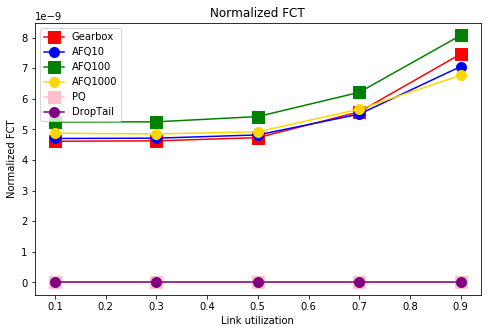

In [78]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/8pods/tcp-small_init_win"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT(dir, toponame)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT(dir, toponame)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT(dir, toponame)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT(dir, toponame)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, null, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

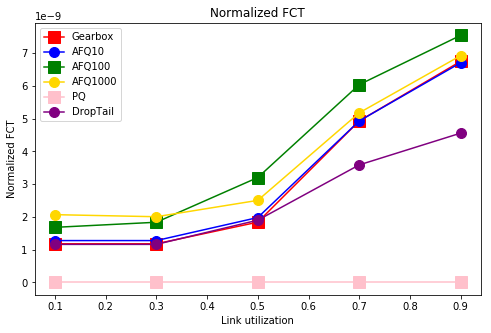

In [27]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "10"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)
#dir = path+"/droptail-600/"
#FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

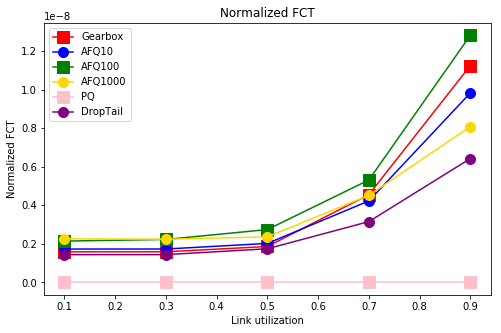

In [23]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "25"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

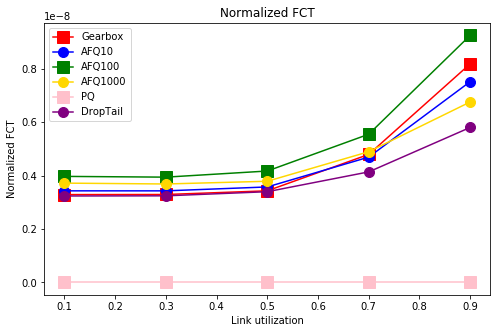

In [24]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "50"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

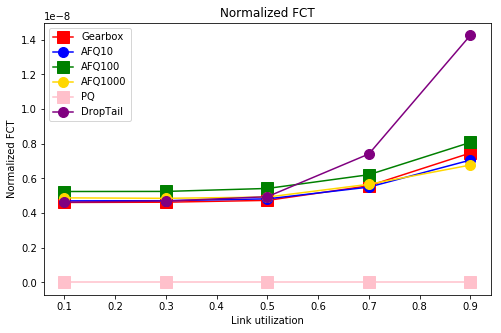

In [28]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "100"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)
#dir = path+"/droptail-600/"
#FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)


plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

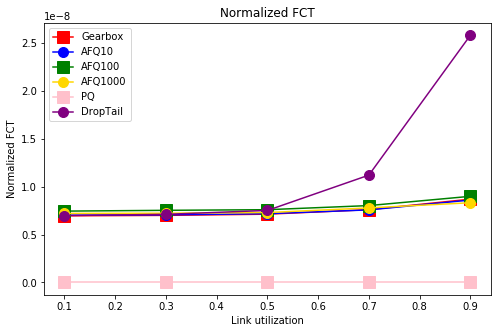

In [26]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "200"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

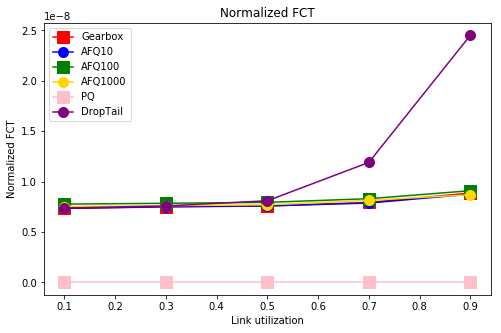

In [42]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "250"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

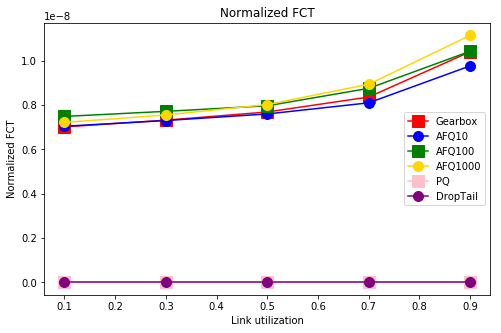

In [40]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "500"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, null, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

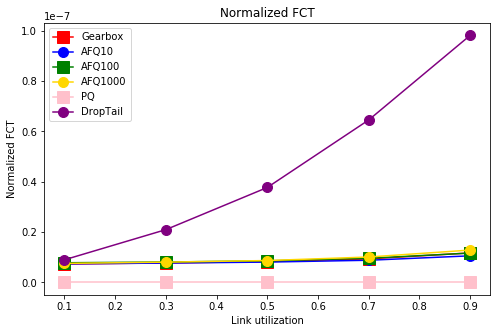

In [39]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "1000"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

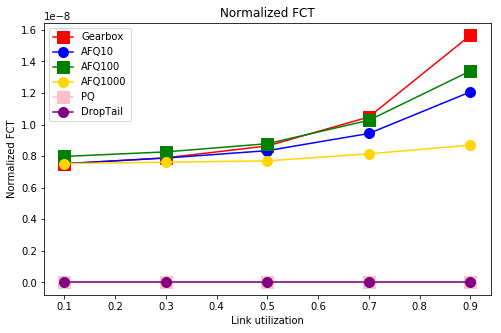

In [45]:
toponame = "Topology-large-incast.tcl"
null = [0,0,0,0,0]
path = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/Mengqi/tcp-small_init_win"
flow = "2000"
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = path+"/tcp-incast-HRCC/"
FCT_list_HCS = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ10/"
FCT_list_AFQ10 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-AFQ100/"
FCT_list_AFQ100 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
#dir = path+"/tcp-incast-AFQ1000/"
#FCT_list_AFQ1000 = read_trace_and_cal_FCT_flows(dir, toponame, flow)
dir = path+"/tcp-incast-DropTail/"
FCT_list_DropTail = read_trace_and_cal_FCT_flows(dir, toponame, flow)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, null, null, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

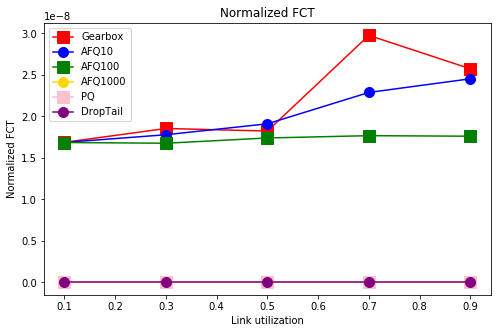

In [58]:
toponame = "Topology-4incast.tcl"
null = [0,0,0,0,0]
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-small_init_win/tcp-incast-HRCC/"
FCT_list_HCS = sort_and_filter(dir, toponame, 30)
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-small_init_win/tcp-incast-AFQ10/"
FCT_list_AFQ10 = sort_and_filter(dir, toponame, 30)
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-small_init_win/tcp-incast-AFQ100/"
FCT_list_AFQ100 = sort_and_filter(dir, toponame, 30)
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-small_init_win/tcp-incast-AFQ1000/"
FCT_list_AFQ1000 = sort_and_filter(dir, toponame, 30)

plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, null, null, null, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

In [48]:
threshold = 30
toponame = "Topology-4incast.tcl"
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-small_init_win/tcp-incast-HRCC/"
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
#filename = "tcp_flow_100_0.1_"+toponame+".tr"
#filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
#tcp_100_0d1 = parse_trace(dir, filename)
#filename = "tcp_flow_100_0.3_"+toponame+".tr"
#tcp_100_0d3 = parse_trace(dir, filename)
#filename = "tcp_flow_100_0.5_"+toponame+".tr"
#tcp_100_0d5 = parse_trace(dir, filename)
#filename = "tcp_flow_100_0.7_"+toponame+".tr"
#tcp_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_"+toponame+".tr"
tcp_100_0d9 = parse_trace(dir, filename)

#tcp_100_0d1_srt = tcp_100_0d1.sort_values(by=["tmp_pkts"])
#tcp_100_0d3_srt = tcp_100_0d3.sort_values(by=["tmp_pkts"])
#tcp_100_0d5_srt = tcp_100_0d5.sort_values(by=["tmp_pkts"])
#tcp_100_0d7_srt = tcp_100_0d7.sort_values(by=["tmp_pkts"])
tcp_100_0d9_srt = tcp_100_0d9.sort_values(by=["tmp_pkts"])

#tcp_100_0d1_small = tcp_100_0d1_srt.head(threshold)
#tcp_100_0d3_small = tcp_100_0d3_srt.head(threshold)
#tcp_100_0d5_small = tcp_100_0d5_srt.head(threshold)
#tcp_100_0d7_small = tcp_100_0d7_srt.head(threshold)
tcp_100_0d9_small = tcp_100_0d9_srt.head(threshold)

tcp_100_0d9_small

,tmp_pkts,flow duration,fin_fid,rtt times,group_id,Tw_,Tp_,Np_,?1,?2,?3,?4,?5,Average rate,start time,Normalized FCT
49,6.0,0.001450,98,0,0,0,0,3,1,1,0.0,0.0,0,4.833370e+07,3.918607,2.068950e-08
34,6.0,0.006080,76,0,0,1,0,3,1,1,0.0,0.0,0,1.152585e+07,3.256242,8.676147e-08
38,6.0,0.001609,86,0,0,1,1,3,1,1,0.0,0.0,0,4.354515e+07,3.389106,2.296467e-08
42,6.0,0.001450,84,0,0,0,0,3,1,1,0.0,0.0,0,4.833370e+07,3.507121,2.068950e-08
45,6.0,0.001609,90,0,0,1,1,3,1,1,0.0,0.0,0,4.355203e+07,3.792345,2.296104e-08
47,6.0,0.002919,100,0,0,1,0,3,1,1,0.0,0.0,0,2.400679e+07,3.811866,4.165488e-08
18,6.0,0.001462,28,0,0,1,0,3,1,1,0.0,0.0,0,4.793696e+07,2.255912,2.086073e-08
53,6.0,0.001507,102,0,0,0,0,3,1,1,0.0,0.0,0,4.651632e+07,4.095740,2.149783e-08
12,6.0,0.001544,32,0,0,0,1,3,1,1,0.0,0.0,0,4.539407e+07,2.103736,2.202931e-08
66,6.0,0.001450,138,0,0,1,1,3,1,1,0.0,0.0,0,4.833370e+07,4.693373,2.068950e-08


#FCT_list_AFQ100

In [13]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"

In [14]:
tcp_HCS_100_0d1 = parse_trace(dir, filename)

In [15]:
tcp_HCS_100_0d1

,tmp_pkts,flow duration,fin_fid,rtt times,group_id,Tw_,Tp_,Np_,?1,?2,?3,?4,?5,Average rate,start time,Normalized FCT
0,6.0,0.000738,23,0,2,1,1,3,1,1,0.0,0.0,0,9.494906e+07,3.461665,1.053196e-08
1,6.0,0.000738,22,0,2,1,0,3,1,1,0.0,0.0,0,9.494906e+07,3.500754,1.053196e-08
2,6.0,0.000738,21,0,2,0,1,3,1,1,0.0,0.0,0,9.494906e+07,3.540604,1.053196e-08
3,14.0,0.019635,30,1,1,0,1,3,1,1,0.0,0.0,0,8.328105e+06,3.834719,1.200753e-07
4,116.0,0.015197,28,0,2,0,1,3,1,1,0.0,0.0,0,8.915538e+07,4.157797,1.121637e-08
5,6377.0,0.573895,17,1,1,0,1,3,1,1,0.0,0.0,0,1.297857e+08,3.708239,7.705011e-09
6,5852.0,0.562860,16,1,1,0,0,3,1,1,0.0,0.0,0,1.214359e+08,3.752383,8.234799e-09
7,5326.0,0.535924,15,1,0,1,1,3,1,1,0.0,0.0,0,1.160755e+08,3.797499,8.615084e-09
8,4801.0,0.499249,14,1,0,1,0,3,1,1,0.0,0.0,0,1.123201e+08,3.843631,8.903129e-09
9,4276.0,0.455571,13,1,0,0,1,3,1,1,0.0,0.0,0,1.096288e+08,3.890826,9.121687e-09


In [16]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_HPCC_incast/"
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_HCS_100_0d3 = parse_trace(dir, filename)

In [17]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_HPCC_incast/"
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_HCS_100_0d5 = parse_trace(dir, filename)

In [18]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_HPCC_incast/"
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_HCS_100_0d7 = parse_trace(dir, filename)

In [19]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_HPCC_incast/"
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_HCS_100_0d9 = parse_trace(dir, filename)

In [20]:
tcp_HCS_100_0d9["Normalized FCT"].mean()

5.649239788907774e-08

In [21]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_DropTail_incast/"
#filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
#tcp_DropTail_100_0d1 = parse_trace(dir, filename)

In [22]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_DropTail_incast/"
#filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
#tcp_DropTail_100_0d3 = parse_trace(dir, filename)

In [23]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_DropTail_incast/"
#filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
#tcp_DropTail_100_0d5 = parse_trace(dir, filename)

In [24]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_DropTail_incast/"
#filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
#tcp_DropTail_100_0d7 = parse_trace(dir, filename)

In [25]:
#dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/data/100_DropTail_incast/"
#filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
#tcp_DropTail_100_0d9 = parse_trace(dir, filename)

In [26]:
#tcp_DropTail_100_0d9["Normalized FCT"].mean()

In [27]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
tcp_HCS_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_HCS_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_HCS_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_HCS_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_HCS_100_0d9 = parse_trace(dir, filename)

In [28]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-Large-DropTail/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
tcp_DropTail_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_DropTail_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_DropTail_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_DropTail_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_DropTail_100_0d9 = parse_trace(dir, filename)

In [29]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-AFQ10/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
tcp_AFQ10_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_AFQ10_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_AFQ10_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_AFQ10_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_AFQ10_100_0d9 = parse_trace(dir, filename)

In [30]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-AFQ100/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
tcp_AFQ100_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_AFQ100_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_AFQ100_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_AFQ100_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_AFQ100_100_0d9 = parse_trace(dir, filename)

In [31]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-AFQ1000/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
tcp_AFQ1000_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_AFQ1000_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_AFQ1000_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_AFQ1000_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_AFQ1000_100_0d9 = parse_trace(dir, filename)

In [32]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-PQ/"
filename = "tcp_flow_100_0.1_Topology-incast.tcl.tr"
tcp_PQ_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-incast.tcl.tr"
tcp_PQ_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-incast.tcl.tr"
tcp_PQ_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-incast.tcl.tr"
tcp_PQ_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-incast.tcl.tr"
tcp_PQ_100_0d9 = parse_trace(dir, filename)

In [33]:
utilization_list = [0.1, 0.3, 0.5, 0.7, 0.9]
FCT_list_HCS = [tcp_HCS_100_0d1["Normalized FCT"].mean(), \
                tcp_HCS_100_0d3["Normalized FCT"].mean(), \
                tcp_HCS_100_0d5["Normalized FCT"].mean(), \
                tcp_HCS_100_0d7["Normalized FCT"].mean(), \
                tcp_HCS_100_0d9["Normalized FCT"].mean()]
FCT_list_DropTail = [tcp_DropTail_100_0d1["Normalized FCT"].mean(), \
                     tcp_DropTail_100_0d3["Normalized FCT"].mean(), \
                     tcp_DropTail_100_0d5["Normalized FCT"].mean(), \
                     tcp_DropTail_100_0d7["Normalized FCT"].mean(), \
                     tcp_DropTail_100_0d9["Normalized FCT"].mean()]
FCT_list_AFQ10 = [tcp_AFQ10_100_0d1["Normalized FCT"].mean(), \
                  tcp_AFQ10_100_0d3["Normalized FCT"].mean(), \
                  tcp_AFQ10_100_0d5["Normalized FCT"].mean(), \
                  tcp_AFQ10_100_0d7["Normalized FCT"].mean(), \
                  tcp_AFQ10_100_0d9["Normalized FCT"].mean()]
FCT_list_AFQ100 = [tcp_AFQ100_100_0d1["Normalized FCT"].mean(), \
                   tcp_AFQ100_100_0d3["Normalized FCT"].mean(), \
                   tcp_AFQ100_100_0d5["Normalized FCT"].mean(), \
                   tcp_AFQ100_100_0d7["Normalized FCT"].mean(), \
                   tcp_AFQ100_100_0d9["Normalized FCT"].mean()]
FCT_list_AFQ1000 = [tcp_AFQ1000_100_0d1["Normalized FCT"].mean(), \
                    tcp_AFQ1000_100_0d3["Normalized FCT"].mean(), \
                    tcp_AFQ1000_100_0d5["Normalized FCT"].mean(), \
                    tcp_AFQ1000_100_0d7["Normalized FCT"].mean(), \
                    tcp_AFQ1000_100_0d9["Normalized FCT"].mean()]
FCT_list_PQ = [tcp_PQ_100_0d1["Normalized FCT"].mean(), \
               tcp_PQ_100_0d3["Normalized FCT"].mean(), \
               tcp_PQ_100_0d5["Normalized FCT"].mean(), \
               tcp_PQ_100_0d7["Normalized FCT"].mean(), \
               tcp_PQ_100_0d9["Normalized FCT"].mean()]

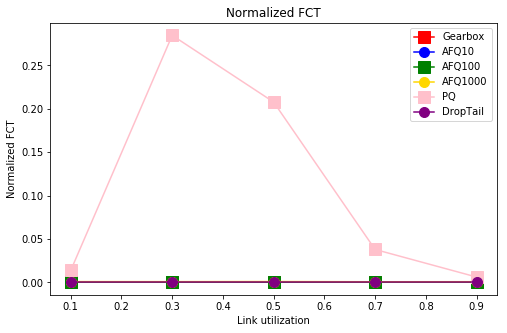

In [34]:
plotting_FCT(utilization_list, FCT_list_HCS, FCT_list_AFQ10, FCT_list_AFQ100, FCT_list_AFQ1000, FCT_list_PQ, FCT_list_DropTail, "Gearbox", "AFQ10", "AFQ100", "AFQ1000", "PQ", "DropTail")

In [35]:
print(FCT_list_HCS)
print(FCT_list_AFQ10)
print(FCT_list_AFQ100)
print(FCT_list_AFQ1000)
print(FCT_list_PQ)

[5.678802996381048e-09, 1.2487429064263466e-08, 2.3254598396704393e-08, 3.872704534884213e-08, 5.649239788907774e-08]
[5.093167772097774e-09, 1.2166615494528992e-08, 1.90482509510913e-08, 3.2475095626810904e-08, 4.8934958893446926e-08]
[4.840525389281897e-09, 6.4868298666371176e-09, 9.919922160943634e-09, 1.5301836677488266e-08, 1.939328032989103e-08]
[0.0009363290970659248, 0.0008998828468925108, 0.0009974204164409264, 0.0007974102007342258, 0.0008551487356407786]
[0.013841786407695702, 0.2845420373469824, 0.20769799594896188, 0.03797071650952321, 0.006232334130515007]


In [36]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-HRCC/"
filename = "tcp_flow_100_0.1_Topology-4incast.tcl.tr"
tcp_4HCS_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-4incast.tcl.tr"
tcp_4HCS_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-4incast.tcl.tr"
tcp_4HCS_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-4incast.tcl.tr"
tcp_4HCS_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-4incast.tcl.tr"
tcp_4HCS_100_0d9 = parse_trace(dir, filename)

In [37]:
dir = "/Users/peixuangao/Documents/NYU/Project/NS2/Hyline/Gearbox-Hyline/HyLine/eval/tcp-incast-AFQ100/"
filename = "tcp_flow_100_0.1_Topology-4incast.tcl.tr"
tcp_4AFQ100_100_0d1 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.3_Topology-4incast.tcl.tr"
tcp_4AFQ100_100_0d3 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.5_Topology-4incast.tcl.tr"
tcp_4AFQ100_100_0d5 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.7_Topology-4incast.tcl.tr"
tcp_4AFQ100_100_0d7 = parse_trace(dir, filename)
filename = "tcp_flow_100_0.9_Topology-4incast.tcl.tr"
tcp_4AFQ100_100_0d9 = parse_trace(dir, filename)

In [38]:
FCT_list_4HCS = [tcp_4HCS_100_0d1["Normalized FCT"].mean(), \
                tcp_4HCS_100_0d3["Normalized FCT"].mean(), \
                tcp_4HCS_100_0d5["Normalized FCT"].mean(), \
                tcp_4HCS_100_0d7["Normalized FCT"].mean(), \
                tcp_4HCS_100_0d9["Normalized FCT"].mean()]

FCT_list_4AFQ100 = [tcp_4AFQ100_100_0d1["Normalized FCT"].mean(), \
                   tcp_4AFQ100_100_0d3["Normalized FCT"].mean(), \
                   tcp_4AFQ100_100_0d5["Normalized FCT"].mean(), \
                   tcp_4AFQ100_100_0d7["Normalized FCT"].mean(), \
                   tcp_4AFQ100_100_0d9["Normalized FCT"].mean()]

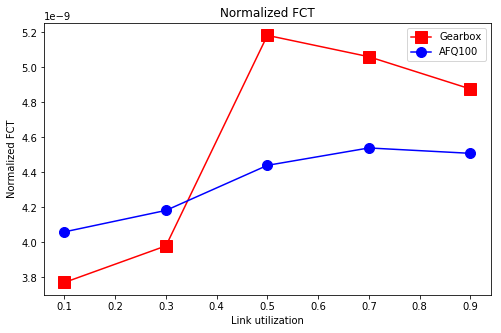

In [39]:
plotting_2FCT(utilization_list, FCT_list_4HCS, FCT_list_4AFQ100, "Gearbox", "AFQ100")

In [40]:
# original

In [41]:
tcp_HCS_100_0d1_srt = tcp_HCS_100_0d1.sort_values(by=["tmp_pkts"])
tcp_HCS_100_0d3_srt = tcp_HCS_100_0d3.sort_values(by=["tmp_pkts"])
tcp_HCS_100_0d5_srt = tcp_HCS_100_0d5.sort_values(by=["tmp_pkts"])
tcp_HCS_100_0d7_srt = tcp_HCS_100_0d7.sort_values(by=["tmp_pkts"])
tcp_HCS_100_0d9_srt = tcp_HCS_100_0d9.sort_values(by=["tmp_pkts"])

tcp_DropTail_100_0d1_srt = tcp_DropTail_100_0d1.sort_values(by=["tmp_pkts"])
tcp_DropTail_100_0d3_srt = tcp_DropTail_100_0d3.sort_values(by=["tmp_pkts"])
tcp_DropTail_100_0d5_srt = tcp_DropTail_100_0d5.sort_values(by=["tmp_pkts"])
tcp_DropTail_100_0d7_srt = tcp_DropTail_100_0d7.sort_values(by=["tmp_pkts"])
tcp_DropTail_100_0d9_srt = tcp_DropTail_100_0d9.sort_values(by=["tmp_pkts"])

In [42]:
#tcp_HCS_100_0d1_srt.head(15)

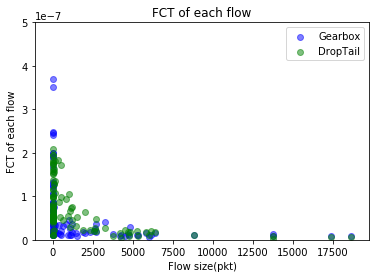

In [43]:
FCT_HRS = tcp_HCS_100_0d9_srt["Normalized FCT"]
FCT_DropTail = tcp_DropTail_100_0d9_srt["Normalized FCT"]
flow_size = tcp_HCS_100_0d9_srt["tmp_pkts"]

fig = plt.figure()
ax = plt.subplot()
ax.scatter(flow_size, FCT_HRS, c='blue', alpha=0.5, label='Gearbox')
ax.scatter(flow_size, FCT_DropTail, c='green', alpha=0.5, label='DropTail')
ax.set_ylim([0, 0.5e-6])

plt.xlabel("Flow size(pkt)")
plt.ylabel("FCT of each flow")

plt.title("FCT of each flow")
plt.legend(loc='best')

plt.show()

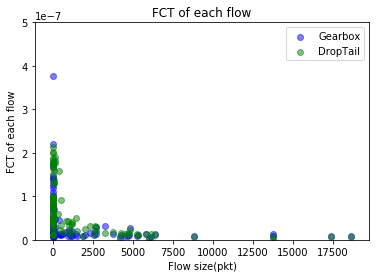

In [44]:
FCT_HRS = tcp_HCS_100_0d7_srt["Normalized FCT"]
FCT_DropTail = tcp_DropTail_100_0d7_srt["Normalized FCT"]
flow_size = tcp_HCS_100_0d7_srt["tmp_pkts"]

fig = plt.figure()
ax = plt.subplot()
ax.scatter(flow_size, FCT_HRS, c='blue', alpha=0.5, label='Gearbox')
ax.scatter(flow_size, FCT_DropTail, c='green', alpha=0.5, label='DropTail')
ax.set_ylim([0, 0.5e-6])

plt.xlabel("Flow size(pkt)")
plt.ylabel("FCT of each flow")

plt.title("FCT of each flow")
plt.legend(loc='best')

plt.show()